In [2]:
import pandas as pd
import gensim.models
import gensim.corpora
import gensim as gs
import pyLDAvis as pvis
import pyLDAvis.gensim
import gensim.models.coherencemodel
import matplotlib.pyplot as plt

In [3]:
def make_data(dataset_name):
    print("loading vector data for", dataset_name)
    sentences = pd.read_csv("../cleaned/" + dataset_name + "_stems.csv", delimiter=",").astype(str).values.tolist() 
    for index, sample in enumerate(sentences): 
            sentences[index] = list(filter((" ").__ne__, sample))
    #sentences_whole = [" ".join(sentence) for sentence in sentences_split]
    #tokens = [token for sentence in sentences_split for token in sentence]
    dic = gs.corpora.Dictionary(sentences)
    corpus = [dic.doc2bow(sample) for sample in sentences]
    #print("--- sentences_split: \n", sentences_split, "\n")
    #print("--- sentences_whole: \n", sentences_whole, "\n")
    #print("--- tokens: \n", tokens, "\n")
    return sentences, dic, corpus

def build_corpus(sentences_split):
    
    return dic, corpus

def visualize_lda(model, corpus, dic):
    pvis.enable_notebook()
    vis = pvis.gensim.prepare(model, corpus, dic)
    vis.show()

def get_coherence_score(model, sentences, dic):
    # the higher the better it is
    # nutzen um versch. modelle zu vergleichen (mit untersch. topic-anzahö)
    coherence_model_lda = gensim.models.coherencemodel.CoherenceModel(model=model, texts=sentences, dictionary=dic, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)
    return coherence_score

def draw_plot(dataset_name, x, y, best_coherence, best_num_topics):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel="num_topics", ylabel="coherence")
    desc = "dataset: {}\nbest coherence: {}, with topics: {}".format(dataset_name, best_coherence, best_num_topics)
    fig.text(0.5, -0.07, desc, ha='center')
    plt.grid()
    plt.show()
    fig.savefig("../img/num_topics_" + dataset_name + ".png", bbox_inches="tight")
    
def find_best_topic_num(datasets, lim_low, lim_high):
    coherences = []
    models = []

    for dataset_name in datasets:
        sentences, dic, corpus = make_data(dataset_name)
        for i in range(lim_low, lim_high+1):
            print(dataset_name + "... loop {} / {}".format(i, lim_high))
            #lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dic, num_topics=i, random_state=100,
            #                               update_every=1, chunksize=100, passes=10, per_word_topics=True)
            lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dic, num_topics=i, random_state=100,
                                           chunksize=100, passes=10, per_word_topics=True)#update_every=1, 
            models.append(lda_model)
            coherences.append(get_coherence_score(lda_model, sentences, dic))
        max_coherence_index = coherences.index(max(coherences))
        draw_plot(dataset_name, rst(ange(lim_low, len(coherences)+lim_low)), coherences, max(coherences), max_coherence_index+lim_low)
        models[max_coherence_index].save("../models/tm_" + dataset_name + ".model")
    

loading vector data for test
test... loop 5 / 8
test... loop 6 / 8
test... loop 7 / 8


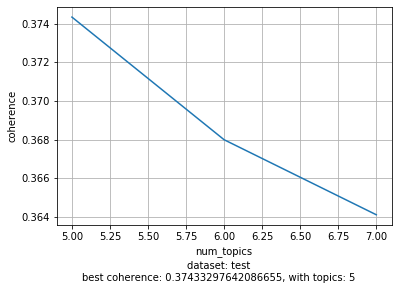

loading vector data for norm_test
norm_test... loop 5 / 8
norm_test... loop 6 / 8
norm_test... loop 7 / 8


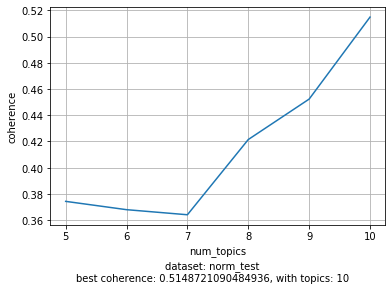

In [7]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# topic 0 is represented as '0.072*"112" + 0.037*"believ" + 0.037*"say" + 0.037*"big" + 0.037*"ass" + 0.037*"album" + 0.037*"simp" + 0.037*"loos" + 0.037*"face" + 0.037*"biggest"')
# these are the top 10 keywords that contribute to this topic
# The weights reflect how important a keyword is to that topic
# usually one cand find a name for the topic (has to look at the keywords manually)

datasets = ["test", "norm_test"]
find_best_topic_num(datasets, 5, 8)

    
    
   


In [ ]:
# trainings, testdaten speichern
# für jeden datensatz ein model speichern
    # iterieren mit unterschiedlicher topic-anzahl
    
# gucken welche topic-ids mit den vier Klassen übereinstimmen
    # vlt die wörter der klasse in den lexika suchen? score ausrechnen (wörter in lexikon/länge der topic-wörter?)
    # das aber nur zusätzlich zum manuellen machen
    
# testdaten laufen lassen
    # gucken welches die höchste topic-id ist
    # schauen ob sie der id entspricht die ich oben aufgestellt habe und klassifikation danach machen
    # confusion matrix etc berechnen

# für jeden unbekannten satz den ich eingebe:
    # in bow umrechnen
    # topic-scores der vier klassen berechhnen
    # klassifizieren
    
# den kram aufschreiben :(

In [ ]:
# show the first 10 topics
#print(lda_model.show_topics(num_topics=10))
# show all tokens that are part of a topic (only the top 2 words)
#print(lda_model.get_topic_terms(topicid=0, topn=2))
# get the word for a id in the dic
#print(id2word[143])
# print corpus
#print(corpus[:1])
# print corpus but with names, not with ids
#print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])
#visualize_lda(lda_model, corpus, dic)
#lda_model.save("location.model")

In [82]:
#pvis.enable_notebook()
#vis = pvis.gensim.prepare(lda_model, corpus, dic)
#vis

In [81]:
#new_doc = [dic.doc2bow(sample) for sample in sentences_split[:1]]
# ein neues doc muss ein satz sein (also eine liste)
#new_doc2 = dic.doc2bow(*sentences_split[:1])
#print(new_doc)
#print(new_doc2)
# get topics from a new document (fremd am besten)
#top = lda_model.get_document_topics(new_doc, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)
#top2 = lda_model.get_document_topics(new_doc2, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)
# zeige alle topics in dem document
#for i, x in enumerate(top):
#    print(x)
#for i, x in enumerate(top2):
#    print(x)

[[(0, 1), (1, 1), (2, 1)]]
[(0, 1), (1, 1), (2, 1)]
[(0, 0.012500053), (1, 0.762499), (2, 0.012500053), (3, 0.012500053), (4, 0.012500053), (5, 0.012500053), (6, 0.012500053), (7, 0.012500053), (8, 0.012500053), (9, 0.012500053), (10, 0.012500053), (11, 0.012500053), (12, 0.012500053), (13, 0.012500053), (14, 0.012500053), (15, 0.012500053), (16, 0.012500053), (17, 0.012500053), (18, 0.012500053), (19, 0.012500053)]
(0, 0.012500053)
(1, 0.762499)
(2, 0.012500053)
(3, 0.012500053)
(4, 0.012500053)
(5, 0.012500053)
(6, 0.012500053)
(7, 0.012500053)
(8, 0.012500053)
(9, 0.012500053)
(10, 0.012500053)
(11, 0.012500053)
(12, 0.012500053)
(13, 0.012500053)
(14, 0.012500053)
(15, 0.012500053)
(16, 0.012500053)
(17, 0.012500053)
(18, 0.012500053)
(19, 0.012500053)
